# Sentiment Analysis using TextBlob on e-commerce data

https://textblob.readthedocs.io/en/dev/

In [1]:
# IMPORTING MODULES TO BE USED
import pandas as pd
import numpy as np
import scipy
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head() # Showing the first 5 data in the dataframe

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

### Description of the dataset columns: 

###### Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
###### Age: Positive Integer variable of the reviewers age.
###### Title: String variable for the title of the review.
###### Review Text: String variable for the review body.
###### Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
###### Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
###### Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
###### Division Name: Categorical name of the product high level division.
###### Department Name: Categorical name of the product department name.
###### Class Name: Categorical name of the product class name.

In [5]:
df.describe() #Performing statistical summary of the data

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [7]:
# Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
df.shape

(23486, 11)

The above infers that the original dataset has 23,486 rows and 11 columns

In [9]:
# Grouping datasets  by Ratings and getting the number of recommendation each rating has:
df.groupby(['Rating'])['Recommended IND'].count()

Rating
1      842
2     1565
3     2871
4     5077
5    13131
Name: Recommended IND, dtype: int64

In [10]:
# Grouping datasets  by Ratings and then by Recommendations and getting the number of positive and negative recommendation each rating has:
df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

### From the analysis above, it can be seen that products rated 1, 2 (low) have low recommendations while those rated high (4,5) have high recommendations

### Creating another dataFrame which includes just the needed columns

In [11]:
reviewDf = df[["Title", "Review Text", "Rating", "Recommended IND"]]

In [12]:
reviewDf.head()

,Title,Review Text,Rating,Recommended IND
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [13]:
reviewDf.tail()

,Title,Review Text,Rating,Recommended IND
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1
23485,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1


In [14]:
reviewDf.shape

(23486, 4)

In [15]:
# Checking for the sum of nall columns in each row of the new dataframe

In [16]:
reviewDf["Review Text"].isna().sum()

845

In [17]:
reviewDf["Title"].isna().sum()

3810

In [18]:
reviewDf["Rating"].isna().sum()

0

In [19]:
reviewDf["Recommended IND"].isna().sum()

0

### Combining the Title and Review Text field into one:

In [20]:
reviewDf["ReviewContent"] = reviewDf["Title"] + " " + reviewDf["Review Text"]

/var/folders/1f/dnl6wyhj1qs_cfg_7mj4dmyw0000gn/T/ipykernel_40845/3457604872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewDf["ReviewContent"] = reviewDf["Title"] + " " + reviewDf["Review Text"]


In [21]:
reviewDf.head()

,Title,Review Text,Rating,Recommended IND,ReviewContent
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,NaN
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,NaN
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Flattering shirt This shirt is very flattering...


In [22]:
reviewDf.head()

,Title,Review Text,Rating,Recommended IND,ReviewContent
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,NaN
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,NaN
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Flattering shirt This shirt is very flattering...


In [23]:
# Dropping the "Review Text" and the "Title" column as it is no longer needed
reviewDf = reviewDf.drop(["Review Text", "Title"],axis=1)

In [24]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent
0,4,1,NaN
1,5,1,NaN
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...


In [25]:
reviewDf.isna().sum()

Rating                0
Recommended IND       0
ReviewContent      3811
dtype: int64

### Seeing that there are 3811 empty columns in the ReviewContent column, we need to drop the columns

In [26]:
reviewDf.dropna()

,Rating,Recommended IND,ReviewContent
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...
5,2,0,Not for the very petite I love tracy reese dre...
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...
...,...,...,...
23481,5,1,Great dress for many occasions I was very happ...
23482,3,1,Wish it was made of cotton It reminds me of ma...
23483,3,0,"Cute, but see through This fit well, but the t..."
23484,3,1,"Very cute dress, perfect for summer parties an..."


In [27]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent
0,4,1,NaN
1,5,1,NaN
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...


<AxesSubplot:xlabel='Rating', ylabel='count'>

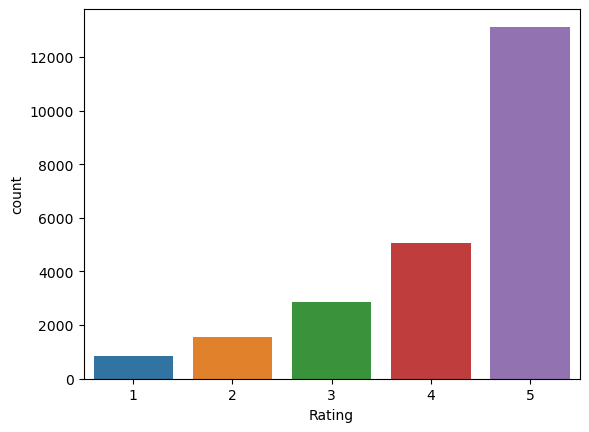

In [28]:
sns.countplot(x="Rating", data=reviewDf)

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

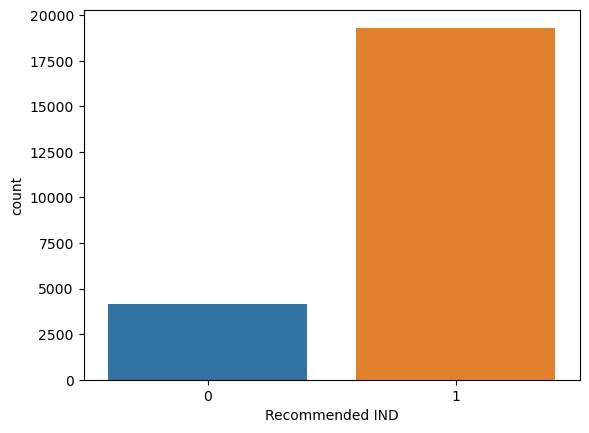

In [29]:
sns.countplot(x="Recommended IND", data=reviewDf)

In [30]:
reviewDf.rename(columns={"Recommended IND": "Recommended"}) #Renaming the field

,Rating,Recommended,ReviewContent
0,4,1,NaN
1,5,1,NaN
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...
...,...,...,...
23481,5,1,Great dress for many occasions I was very happ...
23482,3,1,Wish it was made of cotton It reminds me of ma...
23483,3,0,"Cute, but see through This fit well, but the t..."
23484,3,1,"Very cute dress, perfect for summer parties an..."


In [31]:
reviewDf.drop("Rating", axis=1)

,Recommended IND,ReviewContent
0,1,NaN
1,1,NaN
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
4,1,Flattering shirt This shirt is very flattering...
...,...,...
23481,1,Great dress for many occasions I was very happ...
23482,1,Wish it was made of cotton It reminds me of ma...
23483,0,"Cute, but see through This fit well, but the t..."
23484,1,"Very cute dress, perfect for summer parties an..."


In [32]:
#Removing all non alphabeths in by converting them to a whitespace " " 
def cleanText(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    word = words.lower().split()                   
    return " ".join(word)
#Converting the datatype of the ReviewContent column to string to be able to use the regex package on it:
reviewDf['ReviewContent'] = reviewDf['ReviewContent'].astype(str)
#Applying the clean text function to the ReviewContent column and saving result to another column called cleanedreview
reviewDf['CleanedReview'] = reviewDf['ReviewContent'].apply(cleanText)
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview
0,4,1,nan,nan
1,5,1,nan,nan
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...


In [33]:
#Installing the TextBlob package below

In [34]:
conda install -c conda-forge textblob

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::scikit-learn-intelex==2021.6.0=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2022.10=py39_0
  - defaults/noarch::nltk==3.7=pyhd3eb1b0_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda


Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::scikit-learn-intelex==2021.6.0=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2022.10=py39_0
  - defaults/noarch::nltk==3.7=pyhd3eb1b0_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0



In [35]:
#Using TextBlop to determine review Polarity

In [36]:
!pip install textblob

In [37]:
from textblob import TextBlob

In [38]:
def getPolarity(sentence):
    return TextBlob(sentence).sentiment.polarity

reviewDf['PolarityScore'] = reviewDf["CleanedReview"].apply(getPolarity)

In [39]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview,PolarityScore
0,4,1,nan,nan,0.000000
1,5,1,nan,nan,0.000000
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...,0.075813
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...,0.500000
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...,0.393750


In [40]:
reviewDf.tail()

,Rating,Recommended IND,ReviewContent,CleanedReview,PolarityScore
23481,5,1,Great dress for many occasions I was very happ...,great dress for many occasions i was very happ...,0.551905
23482,3,1,Wish it was made of cotton It reminds me of ma...,wish it was made of cotton it reminds me of ma...,0.091667
23483,3,0,"Cute, but see through This fit well, but the t...",cute but see through this fit well but the top...,0.425000
23484,3,1,"Very cute dress, perfect for summer parties an...",very cute dress perfect for summer parties and...,0.409091
23485,5,1,Please make more like this one! This dress in ...,please make more like this one this dress in a...,0.398333


In [41]:
reviewDf[reviewDf["PolarityScore"] < 0].head(10) # Printing the first 10 reviews with negative polarity

,Rating,Recommended IND,ReviewContent,CleanedReview,PolarityScore
10,3,0,Dress looks like it's made of cheap material D...,dress looks like it s made of cheap material d...,-0.022881
14,3,1,Pretty party dress with some issues This is a ...,pretty party dress with some issues this is a ...,-0.036667
22,2,0,"Not what it looks like First of all, this is n...",not what it looks like first of all this is no...,-0.058095
77,2,0,Zipper broke The zipper broke on this piece th...,zipper broke the zipper broke on this piece th...,-0.166000
78,5,1,Obsessed I usually size up with this brand. sm...,obsessed i usually size up with this brand sma...,-0.034890
84,3,1,Casual & unique tee I received this shirt in m...,casual unique tee i received this shirt in my ...,-0.020833
110,1,0,Poor quality This is so thin and poor quality....,poor quality this is so thin and poor quality ...,-0.285938
114,2,0,Disappointing quality The design/shape of the ...,disappointing quality the design shape of the ...,-0.130823
157,3,0,Australian sizing!! So disappointed that no w...,australian sizing so disappointed that no wher...,-0.050000
199,3,0,Poor quality This skirt looks exactly as pictu...,poor quality this skirt looks exactly as pictu...,-0.018750


### Polarity score greater than 0 to 1 indicates positive polarity while those lesser than 0 to -1 indicate negative polarity